In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import seaborn as sns
from joblib import dump
import kagglehub

c:\Users\Leandre Sabourin\miniconda3\envs\cs50\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



#I've downloaded the dataset on my computer. IF you want to do the same, here's the link to the dataset on kagglehub : https://www.kaggle.com/datasets/tunguz/big-five-personality-test
# You can then dowload the dataset in any ways that suits your computer, wheter it's through kagglehub or else.


data_raw = pd.read_csv(r"C:\Users\Leandre Sabourin\git\FD\data-final.csv", sep='\t')


data = data_raw.copy()
pd.options.display.max_columns = 150
data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)
print('Number of participants: ', len(data))
data.head()




Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [76]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  89227
Number of participants after eliminating missing values:  1013481


In [77]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

In [78]:
# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

In [79]:
# Defining a function to show the questions as well as answers distribution
from matplotlib import pyplot as plt
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(60,60))
    for i in range(0,9):
        plt.subplot(10,3,i+1)
        plt.hist(data[groupname[i]], bins=20, color= color, alpha=.5)
        plt.title(questions[groupname[i]], fontsize=38)
           
            
            


       

Q&As Related to Conscientious Personality


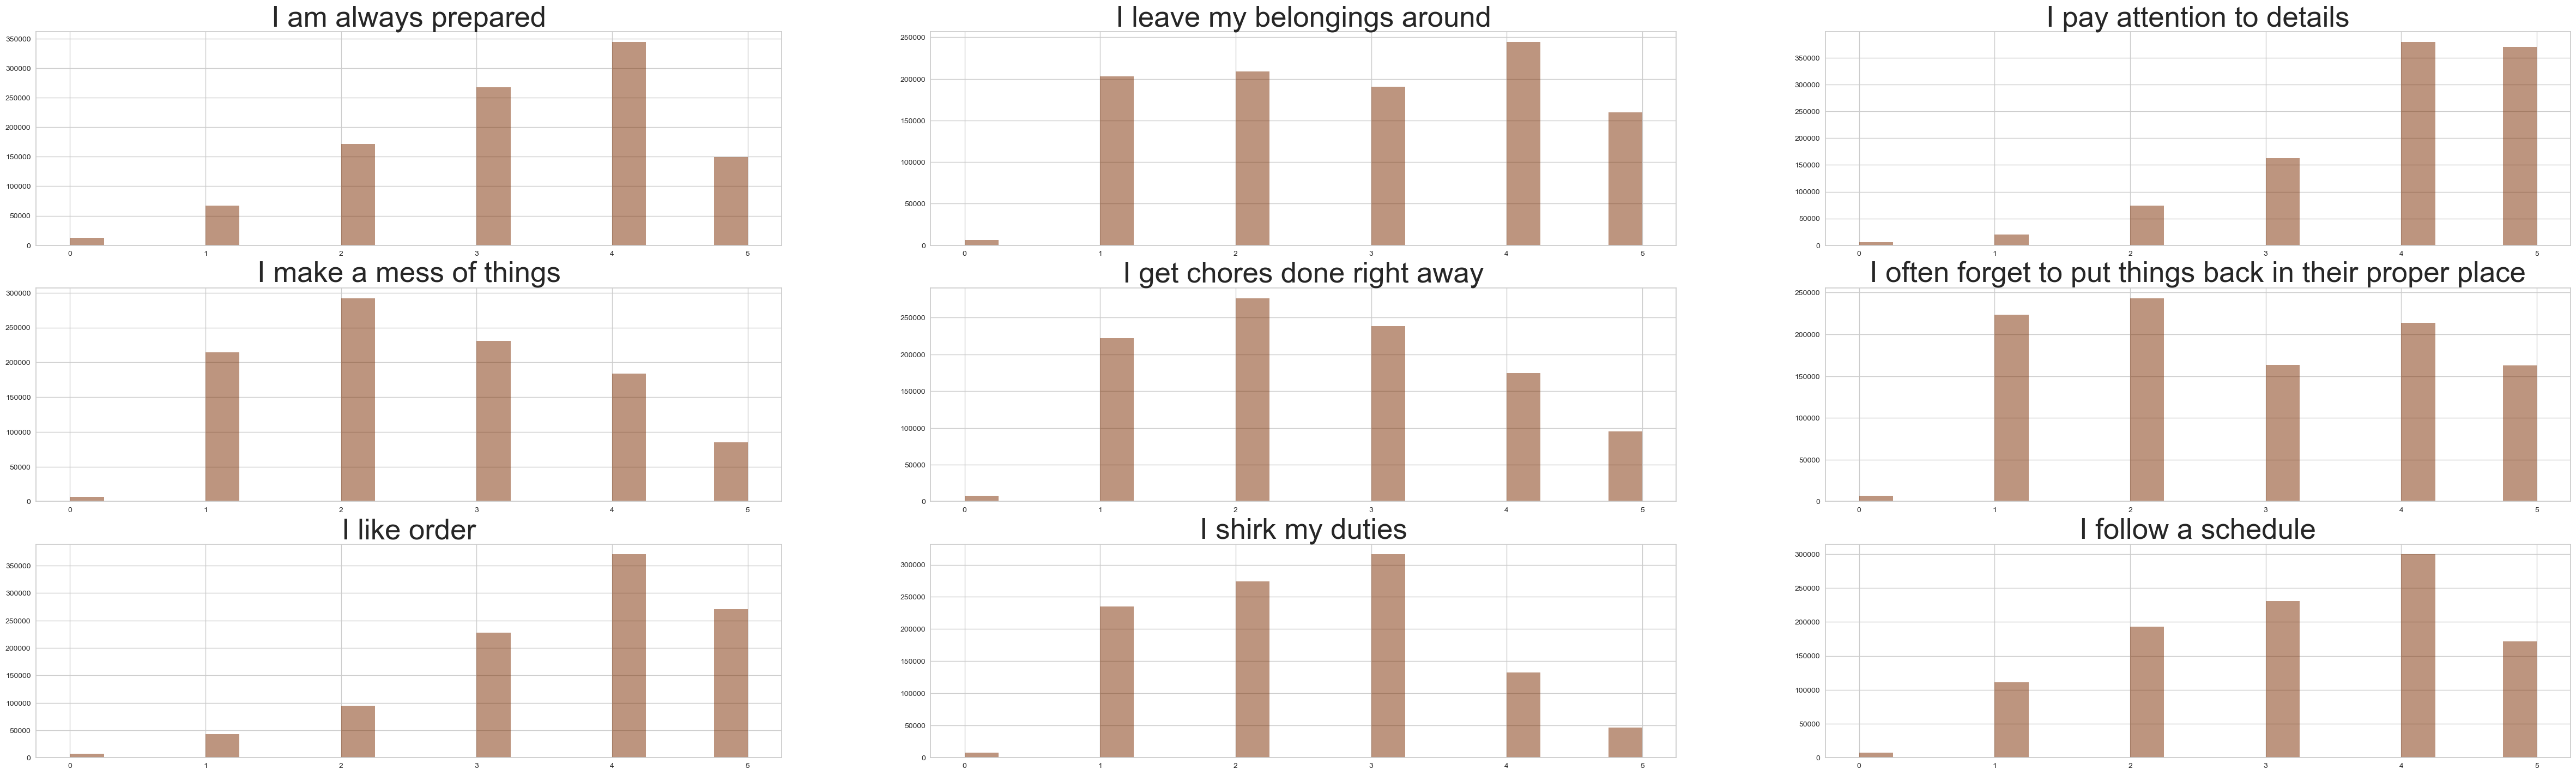

In [80]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, '#7C2D00')


In [81]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df.iloc[:25000, :]
df_sample.head(20)



,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,0.8,0.2,1.0,0.4,1.0,0.2,1.0,0.4,0.8,0.2,0.2,0.8,0.8,0.4,0.4,0.4,0.4,0.4,0.6,0.4,0.4,1.0,0.4,0.8,0.4,0.6,0.4,0.8,0.6,0.8,0.6,0.8,0.6,0.4,0.4,0.8,0.8,0.4,0.8,0.8,1.0,0.2,0.8,0.2,0.8,0.2,1.0,0.6,0.8,1.0
1,0.6,1.0,0.6,0.8,0.6,0.6,0.4,1.0,0.2,1.0,0.4,0.6,0.8,0.2,0.6,0.2,0.4,0.2,0.6,0.2,0.2,0.8,0.2,1.0,0.2,1.0,0.6,0.8,1.0,0.6,0.6,0.4,1.0,0.6,0.6,0.2,0.6,0.6,1.0,0.6,0.2,0.4,0.8,0.4,0.6,0.2,0.8,0.4,1.0,0.6
2,0.4,0.6,0.8,0.8,0.6,0.4,0.2,0.6,0.4,1.0,0.8,0.8,0.8,0.4,0.4,0.4,0.4,0.4,0.2,0.6,0.2,0.8,0.2,0.8,0.4,0.8,0.2,0.8,0.8,0.6,0.8,0.4,0.4,0.4,0.6,0.6,0.8,0.4,0.8,0.4,1.0,0.2,0.4,0.2,0.8,0.4,1.0,0.6,0.8,0.8
3,0.4,0.4,0.4,0.6,0.8,0.4,0.4,0.8,0.2,0.8,0.6,0.6,0.6,0.4,0.6,0.4,0.4,0.4,0.8,0.6,0.4,0.8,0.6,0.8,0.4,0.8,0.4,0.8,0.6,0.8,0.4,0.8,0.8,0.8,0.2,0.4,0.4,0.6,0.2,0.8,0.8,0.4,1.0,0.4,0.6,0.2,0.8,0.8,0.6,0.6
4,0.6,0.6,0.6,0.6,1.0,0.6,0.6,1.0,0.6,0.8,0.2,1.0,1.0,0.6,0.2,0.2,0.2,0.2,0.6,0.4,0.2,1.0,0.2,1.0,0.2,0.6,0.2,1.0,1.0,0.6,1.0,0.2,1.0,0.2,0.6,0.2,1.0,0.2,1.0,1.0,1.0,0.2,1.0,0.2,1.0,0.2,1.0,0.6,1.0,1.0
5,0.6,0.6,0.8,0.4,0.8,0.4,0.4,0.6,0.6,0.8,0.6,0.8,0.6,0.4,0.4,0.2,0.4,0.2,0.4,0.4,0.4,0.6,0.2,0.8,0.4,0.6,0.4,0.6,0.8,0.8,0.6,0.4,0.8,0.2,0.6,0.4,0.8,0.6,0.8,0.6,1.0,0.2,1.0,0.2,0.6,0.2,1.0,0.8,1.0,0.4
6,0.8,0.6,0.8,0.6,0.6,0.6,1.0,0.6,0.8,0.6,0.4,0.8,0.8,0.4,0.8,0.4,0.4,0.4,0.8,0.8,0.2,0.4,0.2,1.0,0.6,1.0,0.6,0.8,0.8,1.0,0.6,0.4,0.8,0.4,0.2,0.8,0.8,0.4,0.4,1.0,1.0,0.4,0.8,0.6,0.8,0.2,1.0,1.0,0.8,0.8
7,0.6,0.2,1.0,0.4,1.0,0.4,1.0,0.4,0.6,0.4,0.4,0.8,0.4,0.8,0.4,0.2,0.4,0.2,0.2,0.2,0.4,1.0,0.4,0.8,0.6,0.4,0.4,0.8,0.8,0.8,1.0,0.2,1.0,0.2,0.8,0.4,0.6,0.4,1.0,1.0,0.8,0.2,0.6,0.2,1.0,0.2,0.8,0.6,0.8,1.0
8,0.4,0.4,0.6,0.6,0.8,0.4,0.4,0.4,0.8,0.8,0.6,0.8,0.8,0.2,0.4,0.4,0.6,0.4,0.6,0.8,0.2,1.0,0.2,1.0,0.2,0.6,0.2,0.8,0.8,0.8,0.6,0.6,0.8,0.0,0.6,0.8,0.2,0.4,0.2,0.8,0.8,0.2,1.0,0.2,0.8,0.2,1.0,0.4,1.0,1.0
9,0.2,1.0,0.6,1.0,0.4,0.6,0.4,0.8,1.0,0.8,0.6,0.6,0.6,0.6,0.8,0.6,0.6,0.6,0.6,0.6,1.0,0.6,1.0,0.2,1.0,0.6,0.8,0.4,0.6,0.4,0.4,1.0,0.2,1.0,0.2,0.8,0.6,0.8,0.4,0.4,0.6,0.2,0.6,0.2,0.6,0.6,0.8,0.6,0.6,0.6


c:\Users\Leandre Sabourin\miniconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Leandre Sabourin\miniconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Leandre Sabourin\miniconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Leandre Sabourin\miniconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The 

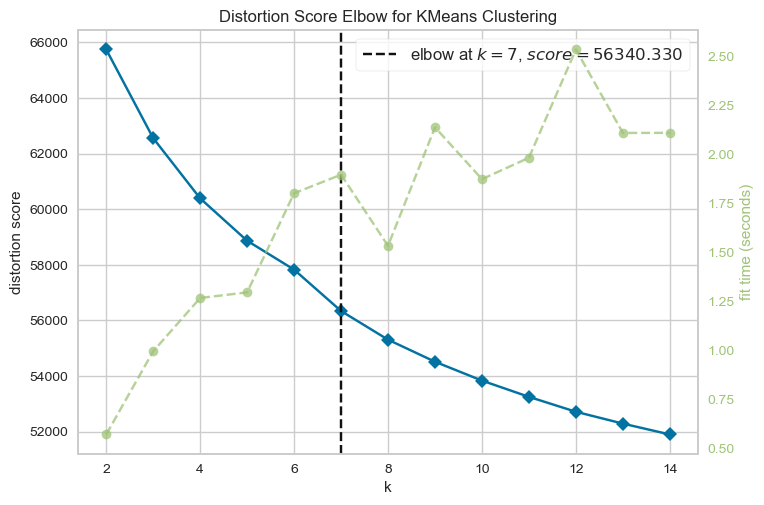

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()


In [83]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# I use the unscaled data but without the country column
df_model = data.drop('country', axis=1)

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=7)
k_fit_50 = kmeans.fit(df_sample)

c:\Users\Leandre Sabourin\miniconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [84]:
# Predicting the Clusters
pd.options.display.max_columns = 10

#labels_ is used to identify Labels of each point
predictions = k_fit_50.labels_
df_sample['Clusters'] = predictions
df_sample.head(20)

C:\Users\Leandre Sabourin\AppData\Local\Temp\ipykernel_10920\2467533037.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['Clusters'] = predictions


,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,0.8,0.2,1.0,0.4,1.0,...,1.0,0.6,0.8,1.0,6
1,0.6,1.0,0.6,0.8,0.6,...,0.8,0.4,1.0,0.6,3
2,0.4,0.6,0.8,0.8,0.6,...,1.0,0.6,0.8,0.8,3
3,0.4,0.4,0.4,0.6,0.8,...,0.8,0.8,0.6,0.6,5
4,0.6,0.6,0.6,0.6,1.0,...,1.0,0.6,1.0,1.0,6
5,0.6,0.6,0.8,0.4,0.8,...,1.0,0.8,1.0,0.4,6
6,0.8,0.6,0.8,0.6,0.6,...,1.0,1.0,0.8,0.8,5
7,0.6,0.2,1.0,0.4,1.0,...,0.8,0.6,0.8,1.0,6
8,0.4,0.4,0.6,0.6,0.8,...,1.0,0.4,1.0,1.0,5
9,0.2,1.0,0.6,1.0,0.4,...,0.8,0.6,0.6,0.6,4


In [85]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
pca_fit = pca.fit_transform(df_sample)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2','PCA3','PCA4','PCA5', 'PCA6','PCA7'])
df_pca['Clusters'] = predictions
df_pca.head()


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,Clusters
0,-2.820465,-0.725445,0.461005,0.071344,-0.125412,0.221530,0.165554,6
1,0.280404,0.258773,-0.932903,0.054611,-0.388518,-0.378500,-0.047439,3
2,0.255676,0.037843,-0.628071,0.135669,-0.481391,0.045717,0.220158,3
3,-1.605908,0.425742,0.415101,-0.011006,-0.501397,-0.128194,0.400977,5
4,-2.828116,-0.315149,-0.926187,-0.638216,-0.323420,0.238578,0.086849,6


Text(0.5, 1.0, 'KMeans algorithm example')

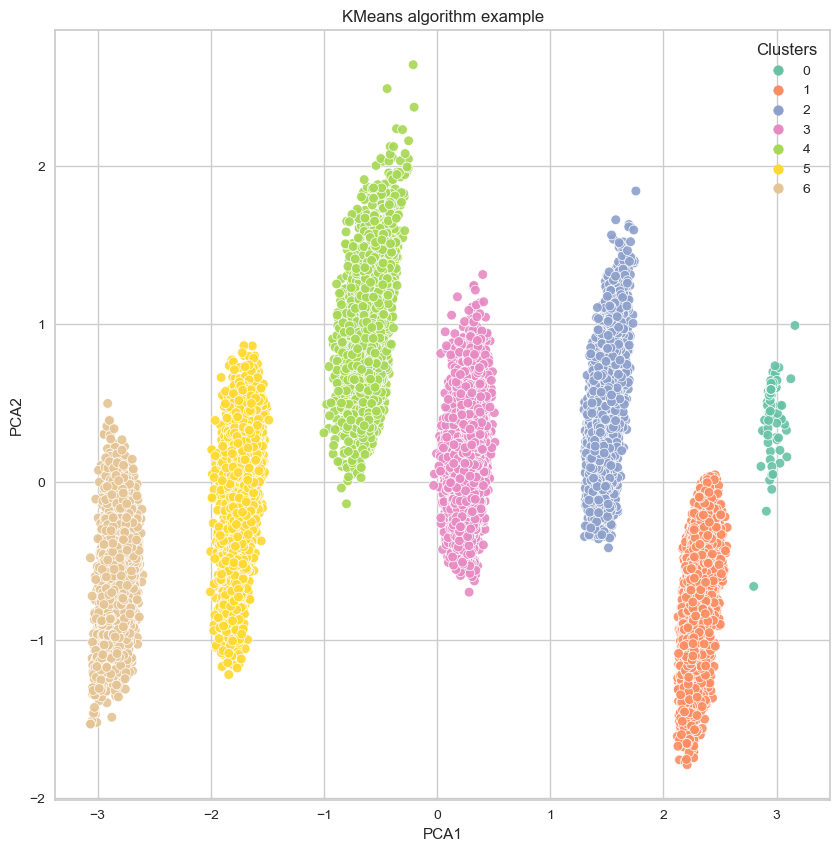

In [86]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.9)
plt.title('KMeans algorithm example')


In [87]:
# Access cluster centroids
centroids = kmeans.cluster_centers_

# Print average scores for each trait in each cluster
traits = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}:")
    for j, trait in enumerate(traits):
        print(f"  {trait}: {centroid[j]:.2f}")

Cluster 0:
  Openness: 0.23
  Conscientiousness: 0.22
  Extraversion: 0.16
  Agreeableness: 0.08
  Neuroticism: 0.08
Cluster 1:
  Openness: 0.69
  Conscientiousness: 0.39
  Extraversion: 0.76
  Agreeableness: 0.51
  Neuroticism: 0.81
Cluster 2:
  Openness: 0.37
  Conscientiousness: 0.72
  Extraversion: 0.48
  Agreeableness: 0.81
  Neuroticism: 0.48
Cluster 3:
  Openness: 0.43
  Conscientiousness: 0.68
  Extraversion: 0.64
  Agreeableness: 0.72
  Neuroticism: 0.58
Cluster 4:
  Openness: 0.40
  Conscientiousness: 0.73
  Extraversion: 0.48
  Agreeableness: 0.76
  Neuroticism: 0.47
Cluster 5:
  Openness: 0.67
  Conscientiousness: 0.43
  Extraversion: 0.78
  Agreeableness: 0.50
  Neuroticism: 0.76
Cluster 6:
  Openness: 0.69
  Conscientiousness: 0.38
  Extraversion: 0.88
  Agreeableness: 0.43
  Neuroticism: 0.87


c:\Users\Leandre Sabourin\miniconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


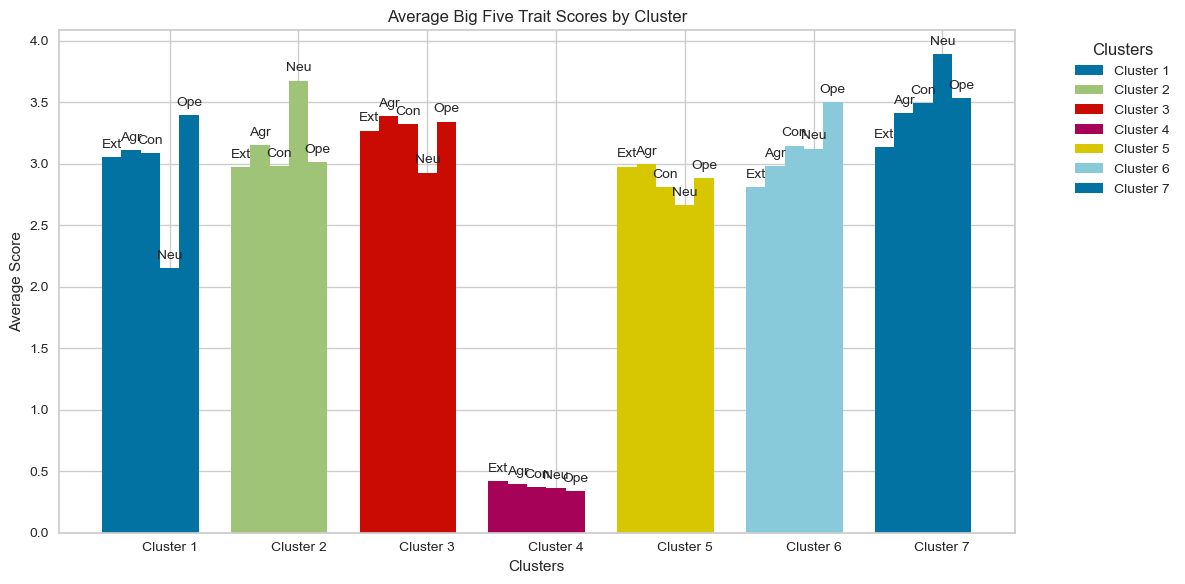

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# List of traits and their corresponding prefixes in the dataset
traits = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']
trait_prefixes = ['EXT', 'AGR', 'CSN', 'EST', 'OPN']

# Create a DataFrame with averaged scores for each trait
trait_averages = pd.DataFrame()

for trait, prefix in zip(traits, trait_prefixes):
    # Select columns that start with the current prefix and calculate row-wise mean
    trait_averages[trait] = data.filter(like=prefix).mean(axis=1)

# Apply K-Means clustering on the trait averages
kmeans = KMeans(n_clusters=7)
k_fit_5 = kmeans.fit(trait_averages)

# Access the cluster labels and the centroids
labels = k_fit_5.labels_
centroids = kmeans.cluster_centers_

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Position of each cluster on the X-axis
cluster_positions = np.arange(centroids.shape[0])

# Width of the bars
width = 0.15

# Plot the centroids, with each cluster's traits grouped together on the X-axis
for i in range(centroids.shape[0]):
    ax.bar(cluster_positions[i] + np.arange(len(traits)) * width, centroids[i], width, label=f'Cluster {i+1}')

# Adjust the X-axis to show the cluster numbers
ax.set_xticks(cluster_positions + width * (centroids.shape[0] - 1) / 2)
ax.set_xticklabels([f'Cluster {i+1}' for i in range(centroids.shape[0])])

# Label each trait above the corresponding bar in each cluster
for i, cluster_pos in enumerate(cluster_positions):
    for j, trait in enumerate(traits):
        ax.text(cluster_pos + j * width, centroids[i, j] + 0.05,  # Position the label above each bar
                f'{trait[:3]}', ha='center', va='bottom', fontsize=10)

# Add labels and title
ax.set_xlabel('Clusters')
ax.set_ylabel('Average Score')
ax.set_title('Average Big Five Trait Scores by Cluster')

# Add a legend to identify traits (only one per trait)
ax.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()







In [89]:
# Assuming X_scaled is your standardized dataset and labels are the cluster assignments
df = pd.DataFrame(df, columns=traits)
df['Cluster'] = kmeans.labels_

# Group by cluster and calculate descriptive statistics
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

         Extraversion  Agreeableness  Conscientiousness  Neuroticism  Openness
Cluster                                                                       
0                 NaN            NaN                NaN          NaN       NaN
1                 NaN            NaN                NaN          NaN       NaN
2                 NaN            NaN                NaN          NaN       NaN
3                 NaN            NaN                NaN          NaN       NaN
4                 NaN            NaN                NaN          NaN       NaN
5                 NaN            NaN                NaN          NaN       NaN
6                 NaN            NaN                NaN          NaN       NaN


In [90]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Prepare the data (same as for K-means, without the 'country' column)
df_model = data.drop('country', axis=1)

df_sample = df_model.sample(n=1000, random_state=42)  # Adjust 'n' as needed

# Proceed with hierarchical clustering on the sampled data
linkage_matrix = linkage(df_sample, method='ward')
# Step 2: Plot the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=7, labels=data.index)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


ValueError: Dimensions of Z and labels must be consistent.

<Figure size 1000x700 with 0 Axes>

In [ ]:
# Step 3: Save the model
dump(k_fit_50, 'big_five_traits.pkl')
dump(scaler, 'scaler.pkl')

print("Model saved as 'big_five_model.pkl'")

Model saved as 'big_five_model.pkl'
